![Banner](https://github.com/LittleHouse75/flatiron-resources/raw/main/NevitsBanner.png)

----

# Enhanced EDA — Ethereum Scam Dataset

----

## 0. Notebook Setup

This section configures autoreload, imports core libraries, and connects the shared `src/` utilities so the rest of the EDA stays clean and focused.

In [1]:
# Enable autoreload so edits to src/*.py modules are picked up without restarting the kernel
%load_ext autoreload
%autoreload 2

# Make the project root importable so we can use src.utilities, src.featureeng, etc.
import sys, os
sys.path.append(os.path.abspath(".."))

# Core libraries
import io
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Project-specific utilities
import src.utilities as util
import src.featureeng as fe

# Consistent plotting style for the whole notebook
sns.set_style("whitegrid")

In [2]:
# ------------------------------------------------------------
# 1. Load the raw Ethereum transaction dataset
#    (util.load_raw_data handles the path + basic logging)
# ------------------------------------------------------------

df = util.load_raw_data()


Loading Dataset

Reading dataset from (CSV): /Users/timnevits/Projects/PythonEnv311/flatiron/project-ethereum/data/Dataset.csv
Dataset loaded successfully with 71,250 rows and 18 columns.


## 1. Original Data Overview

Quick sanity check of the raw dataset: shape, schema, missing values, and how the main category fields are populated.

In [3]:
# ------------------------------------------------------------
# 1.1 Snapshot, schema, and missingness
# ------------------------------------------------------------

util.print_heading("Original Data Overview")

util.print_sub_heading("Data Head (first 5 rows)")
display(df.head())

util.print_sub_heading("Dataset Info (dtypes & non-null counts)")
buffer = io.StringIO()
df.info(buf=buffer)
print(buffer.getvalue())

util.print_sub_heading("Null value counts (per column)")
display(df.isnull().sum())


Original Data Overview


----------------------------------------
Data Head (first 5 rows)
----------------------------------------



,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,receipt_cumulative_gas_used,receipt_gas_used,block_timestamp,block_number,block_hash,from_scam,to_scam,from_category,to_category
0,0x253ec84729f5c11437f5346830e6bdc9857171b16097...,370394,4,0x267be1c1d684f78cb4f6a176c4911b741e4ffdc0,0xd707ac0098599006f0857e8da4c950795645ba01,1.800000e+18,30000,2.205000e+10,0x,129358,21000,2017-10-16 05:26:53 UTC,4370008,0x5e14d30d2155c0cdd65044d7e0f296373f3e92f65ebd...,0,0,NaN,NaN
1,0xfa5f1d7715562adb1e408fdbbbbfc033ae4fadca1e07...,229082,85,0x304cc179719bc5b05418d6f7f6783abe45d83090,0xb8f6e76d34d4877732dfefa6b6a4e2a834a9092b,7.500000e+15,90000,2.060947e+10,0x,5415387,21000,2017-10-16 05:28:49 UTC,4370014,0x900efe010b41b8b6b135db041422fac80b69b96d93c2...,0,0,NaN,NaN
2,0x37928f1d12ee769d0876695aaa815c13d705f8b1e376...,229095,31,0x304cc179719bc5b05418d6f7f6783abe45d83090,0x5ec492652d7b92421680f21169ff6a8dbbc622ab,7.500000e+15,90000,2.060947e+10,0x,1369625,21000,2017-10-16 05:29:19 UTC,4370015,0xfe7d1bc1c6257f92bacb0f8b1266c9894dda99b42e78...,0,0,NaN,NaN
3,0xaad886f331a2fb40495cdf5faa10882852fcd324f064...,229126,78,0x304cc179719bc5b05418d6f7f6783abe45d83090,0xdf01b231b53d8b4cbb1b092a8dc86730cebf4aa9,7.500000e+15,90000,2.060947e+10,0x,2464655,21000,2017-10-16 05:29:43 UTC,4370016,0x1d132e9cd35e9e2cf8350258401b43474772eb1904f1...,0,0,NaN,NaN
4,0x3dbe36fd1a1b01b5e1b343ff78ec1ec189feee5acf46...,229131,83,0x304cc179719bc5b05418d6f7f6783abe45d83090,0xaa4b9693c54029d180134161cc99e98b76cea249,7.500000e+15,90000,2.060947e+10,0x,2569655,21000,2017-10-16 05:29:43 UTC,4370016,0x1d132e9cd35e9e2cf8350258401b43474772eb1904f1...,0,0,NaN,NaN



----------------------------------------
Dataset Info (dtypes & non-null counts)
----------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71250 entries, 0 to 71249
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hash                         71250 non-null  object 
 1   nonce                        71250 non-null  int64  
 2   transaction_index            71250 non-null  int64  
 3   from_address                 71250 non-null  object 
 4   to_address                   71250 non-null  object 
 5   value                        71250 non-null  float64
 6   gas                          71250 non-null  int64  
 7   gas_price                    71250 non-null  float64
 8   input                        71250 non-null  object 
 9   receipt_cumulative_gas_used  71250 non-null  int64  
 10  receipt_gas_used             71250 non-null  int64  
 11  block_ti

hash                               0
nonce                              0
transaction_index                  0
from_address                       0
to_address                         0
value                              0
gas                                0
gas_price                          0
input                              0
receipt_cumulative_gas_used        0
receipt_gas_used                   0
block_timestamp                    0
block_number                       0
block_hash                         0
from_scam                          0
to_scam                            0
from_category                  68622
to_category                    59601
dtype: int64

In [4]:
# ------------------------------------------------------------
# 1.2 Basic distributions for numeric and category columns
# ------------------------------------------------------------

util.print_sub_heading("Descriptive statistics (numeric columns)")
display(df.describe())

util.print_heading("Category distribution overview")

util.print_sub_heading("from_category value counts (including NaN)")
display(df["from_category"].value_counts(dropna=False))

util.print_sub_heading("to_category value counts (including NaN)")
display(df["to_category"].value_counts(dropna=False))


----------------------------------------
Descriptive statistics (numeric columns)
----------------------------------------



,nonce,transaction_index,value,gas,gas_price,receipt_cumulative_gas_used,receipt_gas_used,block_number,from_scam,to_scam
count,7.125000e+04,71250.000000,7.125000e+04,7.125000e+04,7.125000e+04,7.125000e+04,7.125000e+04,7.125000e+04,71250.000000,71250.000000
mean,3.078713e+05,72.694035,1.002473e+19,6.834562e+04,3.449287e+10,2.946858e+06,2.627084e+04,5.209526e+06,0.036884,0.163495
std,9.978455e+05,64.650247,2.858156e+20,1.335602e+05,1.250177e+11,2.444175e+06,5.131794e+04,7.509279e+05,0.188479,0.369819
min,0.000000e+00,0.000000,0.000000e+00,2.100000e+04,1.000000e+00,2.100000e+04,2.100000e+04,4.370008e+06,0.000000,0.000000
25%,3.000000e+00,21.000000,2.490000e+16,2.100000e+04,8.000000e+09,7.744545e+05,2.100000e+04,4.900821e+06,0.000000,0.000000
50%,8.500000e+01,56.000000,2.480000e+17,3.500000e+04,2.000000e+10,2.338859e+06,2.100000e+04,5.067095e+06,0.000000,0.000000
75%,7.515425e+04,109.000000,1.500000e+18,9.000000e+04,5.060947e+10,4.820330e+06,2.100000e+04,5.285231e+06,0.000000,0.000000
max,1.372920e+07,379.000000,6.000000e+22,9.344755e+06,3.000000e+13,9.991824e+06,6.787079e+06,9.185954e+06,1.000000,1.000000



Category distribution overview


----------------------------------------
from_category value counts (including NaN)
----------------------------------------



from_category
NaN         68622
Scamming     1402
Phishing     1225
Fake ICO        1
Name: count, dtype: int64


----------------------------------------
to_category value counts (including NaN)
----------------------------------------



to_category
NaN         59601
Scamming     9758
Phishing     1891
Name: count, dtype: int64

### Fraud Distribution


----------------------------------------
Sender scam flag (from_scam)
----------------------------------------



,Label,Count,Percent
0,Non-scam (0),68622,96.31
1,Scam (1),2628,3.69


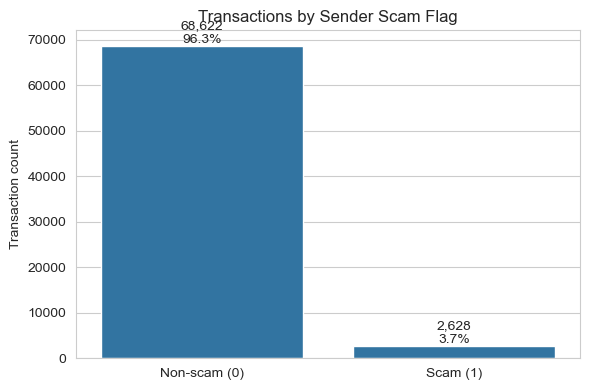


----------------------------------------
Recipient scam flag (to_scam)
----------------------------------------



,Label,Count,Percent
0,Non-scam (0),59601,83.65
1,Scam (1),11649,16.35


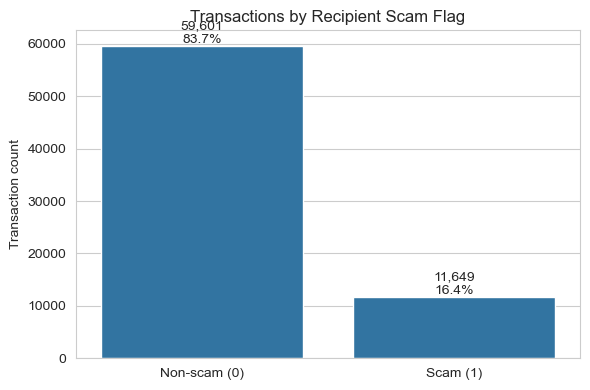


----------------------------------------
Either sender or recipient scam
----------------------------------------



,Label,Count,Percent
0,Neither scam,57000,80.0
1,Either scam,14250,20.0


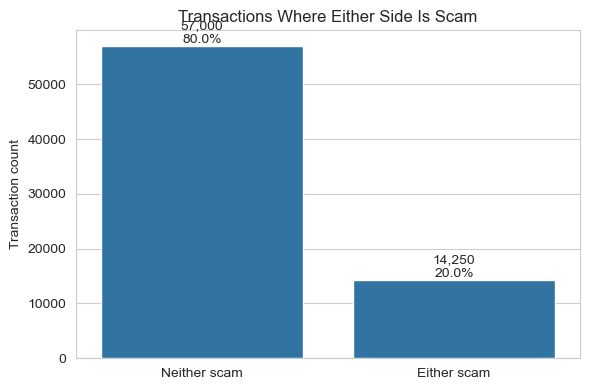

is_scam_tx,False,True
hour,,
0,2150,591
1,2281,451
2,2551,629
3,2358,625
4,2617,568
5,2448,408
6,2451,394
7,2816,492
8,2564,599


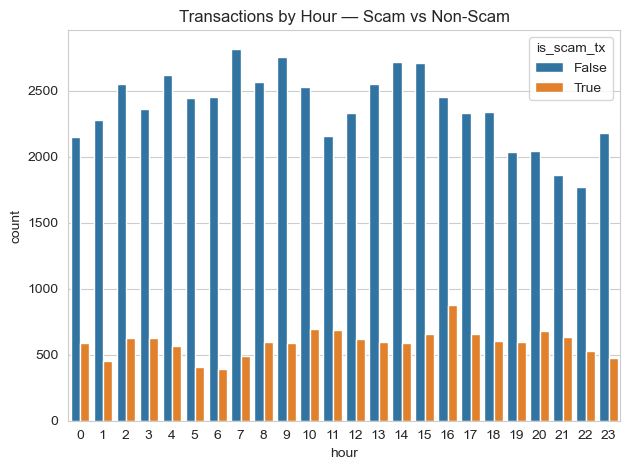

is_scam_tx,False,True
weekday,,
Monday,9552,2702
Tuesday,12075,2555
Wednesday,4510,2526
Thursday,6087,2332
Friday,7566,1146
Saturday,10222,1526
Sunday,6988,1463


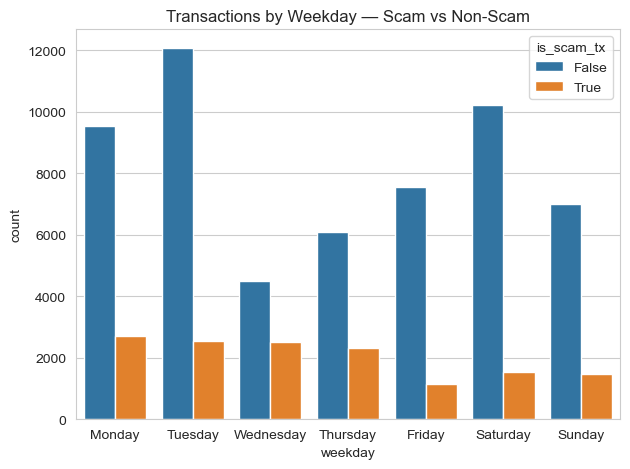

In [20]:
# -----------------------------------------------------
# 1.3 Fraud Distribution
# -----------------------------------------------------

def plot_counts_with_labels(series, title, labels):
    counts = series.value_counts().sort_index()
    pct = (counts / counts.sum() * 100).round(2)

    # ---- table output ----
    table = pd.DataFrame({
        "Label": labels,
        "Count": counts.values,
        "Percent": pct.values,
    })
    display(table)

    # ---- plot ----
    x_positions = np.arange(len(counts))

    fig, ax = plt.subplots(figsize=(6, 4))
    sns.barplot(x=x_positions, y=counts.values, ax=ax)  # no palette => no warning

    # Count + percentage on bars
    for i, c in enumerate(counts.values):
        p = pct.values[i]
        ax.text(
            i,
            c,
            f"{c:,}\n{p:.1f}%",
            ha="center",
            va="bottom",
            fontsize=10,
        )

    ax.set_xticks(x_positions)
    ax.set_xticklabels(labels)
    ax.set_ylabel("Transaction count")
    ax.set_title(title)
    plt.tight_layout()
    plt.show()

    return counts, pct


# ------------------------------------------------------------
# Sender scam flag
# ------------------------------------------------------------
util.print_sub_heading("Sender scam flag (from_scam)")

sender_flag = df["from_scam"].fillna(0).astype(int)
plot_counts_with_labels(
    sender_flag,
    "Transactions by Sender Scam Flag",
    ["Non-scam (0)", "Scam (1)"]
)


# ------------------------------------------------------------
# Recipient scam flag
# ------------------------------------------------------------
util.print_sub_heading("Recipient scam flag (to_scam)")

recipient_flag = df["to_scam"].fillna(0).astype(int)
plot_counts_with_labels(
    recipient_flag,
    "Transactions by Recipient Scam Flag",
    ["Non-scam (0)", "Scam (1)"]
)


# ------------------------------------------------------------
# Either side scam
# ------------------------------------------------------------
util.print_sub_heading("Either sender or recipient scam")

either_flag = (df["from_scam"] == 1) | (df["to_scam"] == 1)
plot_counts_with_labels(
    either_flag,
    "Transactions Where Either Side Is Scam",
    ["Neither scam", "Either scam"]
)

df["is_scam_tx"] = either_flag


# ------------------------------------------------------------
# Hour-of-day by scam vs non-scam
# ------------------------------------------------------------
hour_tbl = (
    df.groupby(["hour", "is_scam_tx"])
      .size()
      .reset_index(name="count")
      .pivot(index="hour", columns="is_scam_tx", values="count")
      .fillna(0)
)
display(hour_tbl)

sns.countplot(x="hour", hue="is_scam_tx", data=df)
plt.title("Transactions by Hour — Scam vs Non-Scam")
plt.tight_layout()
plt.show()


# ------------------------------------------------------------
# Weekday by scam vs non-scam
# ------------------------------------------------------------
weekday_tbl = (
    df.groupby(["weekday", "is_scam_tx"])
      .size()
      .reset_index(name="count")
      .pivot(index="weekday", columns="is_scam_tx", values="count")
      .loc[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]]
      .fillna(0)
)
display(weekday_tbl)

sns.countplot(
    x="weekday", hue="is_scam_tx", data=df,
    order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],
)
plt.title("Transactions by Weekday — Scam vs Non-Scam")
plt.tight_layout()
plt.show()

### Correlation Heatmap (Numeric Features Only)

Here we look at correlations between **numeric features**, explicitly dropping label columns  
(`Scam`, `from_scam`, `to_scam`, and their derived flags) so we don’t get misleadingly strong
correlations driven by the target.


----------------------------------------
Correlation heatmap — numeric features only
----------------------------------------



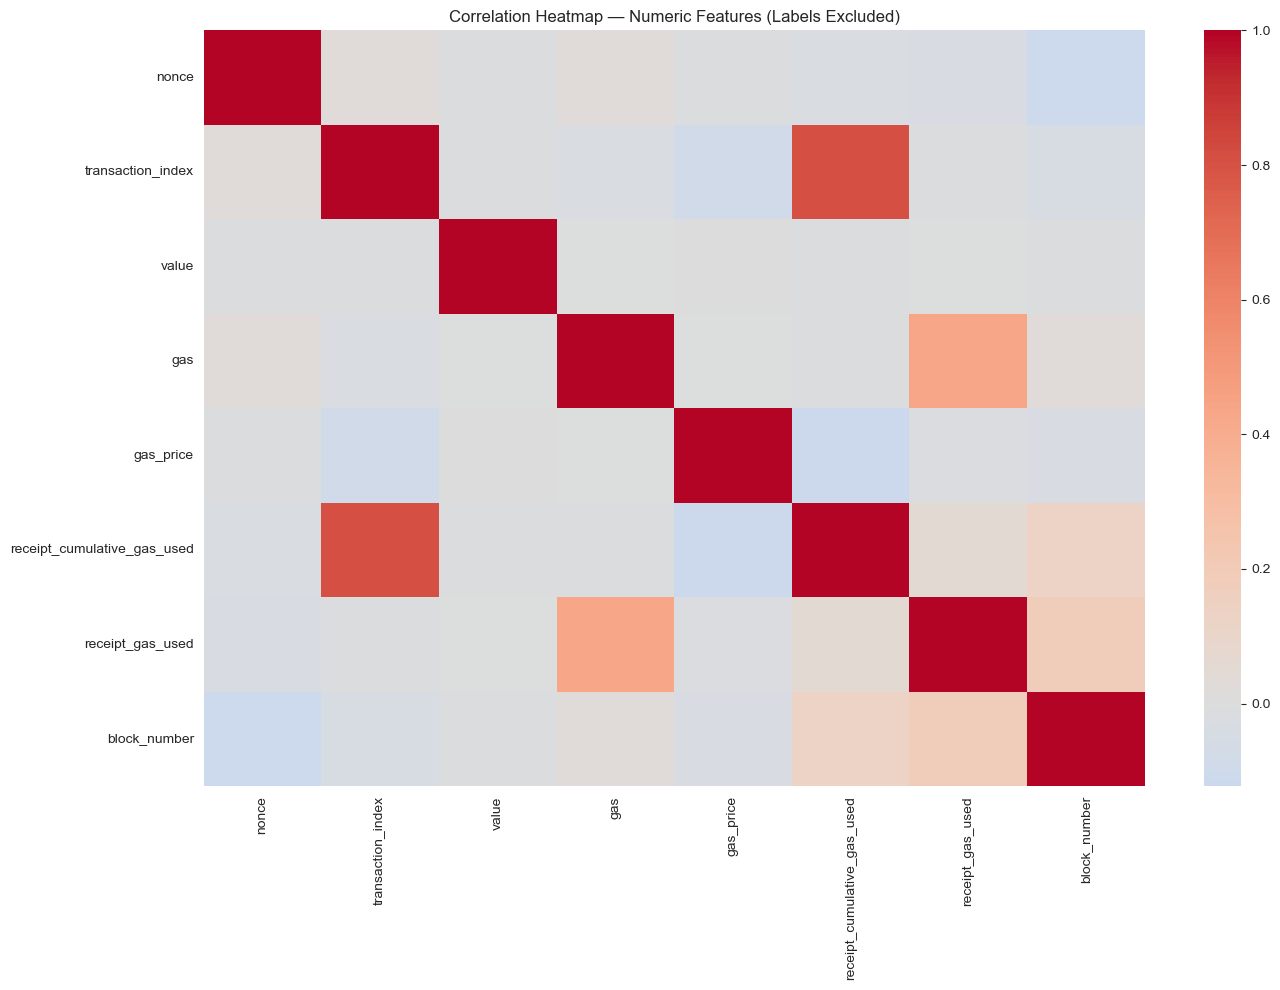

In [6]:
# -----------------------------------------------------
# 1.4 Correlation heatmap for numeric features (labels excluded)
# -----------------------------------------------------

util.print_sub_heading("Correlation heatmap — numeric features only")

# Select numeric columns from the dataframe
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Columns to exclude (label / target-like fields)
exclude_cols = {
    "from_scam",
    "to_scam",
    "from_is_scam",
    "to_is_scam",
}

# Keep only true numeric features (no labels)
numeric_feature_cols = [c for c in numeric_cols if c not in exclude_cols]

# Compute pairwise correlations on numeric features
corr = df[numeric_feature_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap — Numeric Features (Labels Excluded)")
plt.tight_layout()
plt.show()

## 2. Timestamps & Temporal Sanity Checks

Normalize raw timestamps, check for any label-related quirks in missing time fields, and then look at how activity is distributed over calendar time, hours of the day, and days of the week.

In [7]:
# ------------------------------------------------------------
# 2.1 Timestamp normalization and missingness sanity check
# ------------------------------------------------------------

util.print_heading("Section 2 — Timestamps & Temporal Sanity Checks")
util.print_sub_heading("Preprocessing — timestamp normalization")

# Normalize and enrich timestamp columns (block_timestamp_dt, hour, weekday, etc.)
df = fe.normalize_timestamps(df, verbose=True)

util.print_sub_heading("Sanity check — hour missingness by label")

# Check whether missing hour values line up with scam labels (potential leakage)
if "from_scam" in df.columns and "to_scam" in df.columns:
    # A transaction is related to a scam if either sender or receiver is tagged as scam
    scam_mask = (df["from_scam"] == 1) | (df["to_scam"] == 1)

    miss_by_label = df.groupby(scam_mask)["hour"].apply(
        lambda s: s.isna().mean()
    )

    print("Fraction of missing hour values (False = non-scam-related, True = scam-related):")
    print(miss_by_label)
else:
    print("Skipping hour-missingness-by-label check (no from_scam / to_scam columns).")


Section 2 — Timestamps & Temporal Sanity Checks


----------------------------------------
Preprocessing — timestamp normalization
----------------------------------------


----------------------------------------
Timestamp normalization
----------------------------------------

Converting `block_timestamp` into a consistent UTC datetime and adding derived features (hour, weekday).
Value types in timestamp column:
block_timestamp
<class 'str'>    71250
Name: count, dtype: int64
Number of missing raw timestamp values: 0
Parsed timestamps (non-null): 71250
Unparseable timestamps: 0

----------------------------------------
Sanity check — hour missingness by label
----------------------------------------

Fraction of missing hour values (False = non-scam-related, True = scam-related):
False    0.0
True     0.0
Name: hour, dtype: float64



----------------------------------------
Transaction timestamp distribution
----------------------------------------



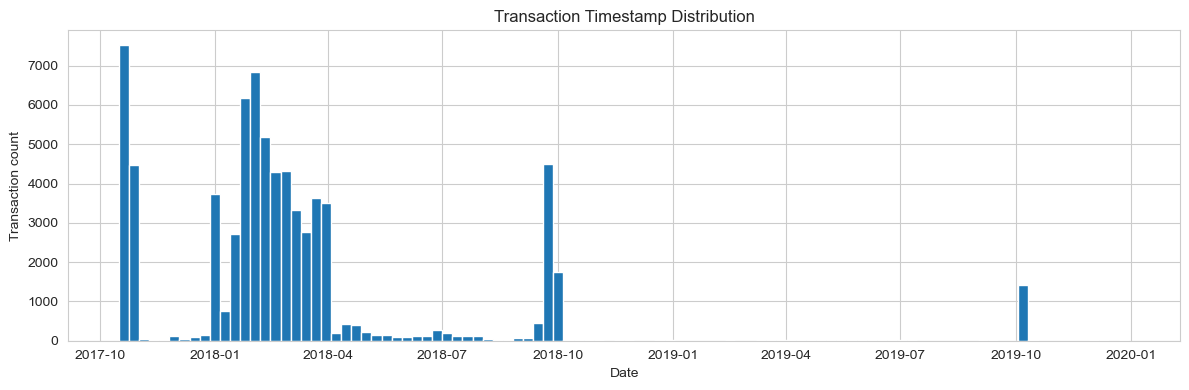


----------------------------------------
Daily transaction volume
----------------------------------------



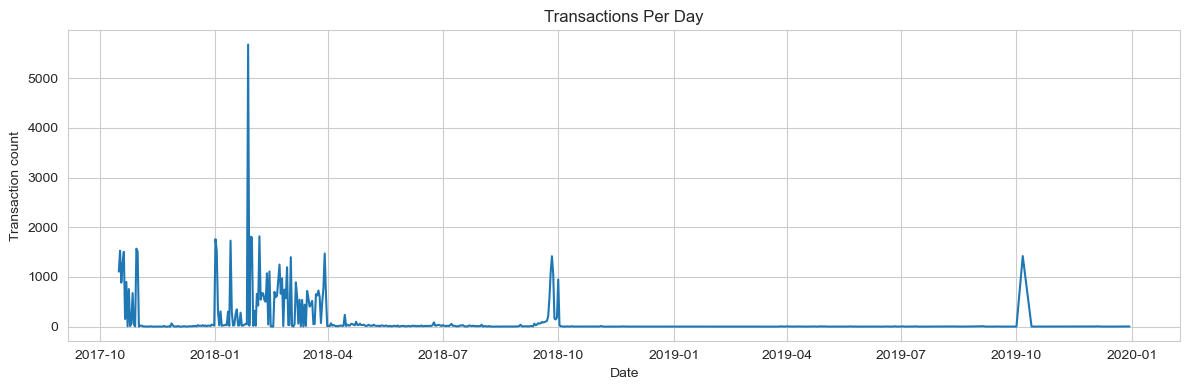

In [8]:
# ------------------------------------------------------------
# 2.2 Coverage over time (timestamps and daily volume)
# ------------------------------------------------------------

# --- Transaction timestamp distribution ---
util.print_sub_heading("Transaction timestamp distribution")
df["block_timestamp_dt"].hist(bins=100, figsize=(12, 4))
plt.title("Transaction Timestamp Distribution")
plt.xlabel("Date")
plt.ylabel("Transaction count")
plt.tight_layout()
plt.show()

# --- Daily transaction volume curve ---
util.print_sub_heading("Daily transaction volume")
daily = df.groupby(df["block_timestamp_dt"].dt.date).size()

plt.figure(figsize=(12, 4))
plt.plot(daily.index, daily.values)
plt.title("Transactions Per Day")
plt.xlabel("Date")
plt.ylabel("Transaction count")
plt.tight_layout()
plt.show()


----------------------------------------
Transactions by hour of day
----------------------------------------

This chart shows how transaction activity is distributed across hours of the day. Human activity tends to produce peaks; bots produce flatter or highly irregular profiles.


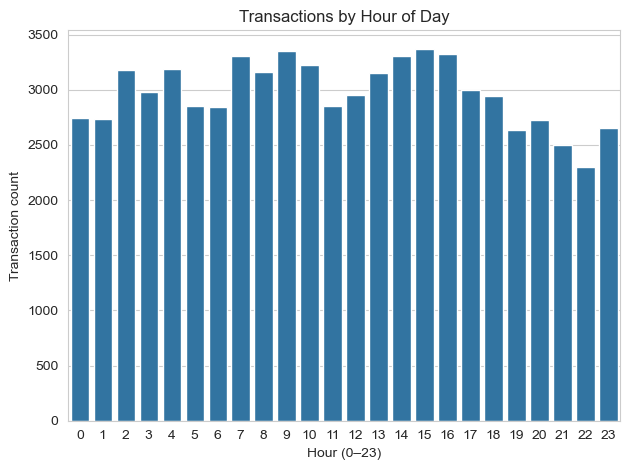


----------------------------------------
Transactions by day of week
----------------------------------------

This chart shows weekly activity rhythms. Human behavior is often cyclical (weekdays vs weekends), while bots and programmatic systems may show no weekly rhythm.


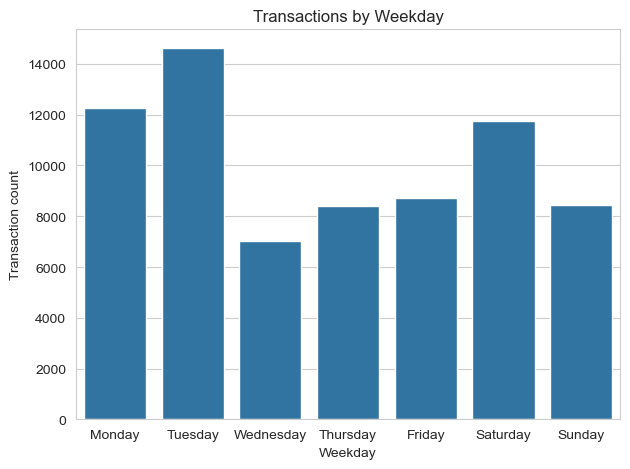

In [9]:
# ------------------------------------------------------------
# 2.3 Time-of-day and weekday activity patterns
# ------------------------------------------------------------

# Hour-of-day activity
util.print_sub_heading("Transactions by hour of day")
print(
    "This chart shows how transaction activity is distributed across hours of the day. "
    "Human activity tends to produce peaks; bots produce flatter or highly irregular profiles."
)

sns.countplot(x="hour", data=df)
plt.title("Transactions by Hour of Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Transaction count")
plt.tight_layout()
plt.show()

# Day-of-week activity
util.print_sub_heading("Transactions by day of week")
print(
    "This chart shows weekly activity rhythms. "
    "Human behavior is often cyclical (weekdays vs weekends), "
    "while bots and programmatic systems may show no weekly rhythm."
)

sns.countplot(
    x="weekday",
    data=df,
    order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
)
plt.title("Transactions by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Transaction count")
plt.tight_layout()
plt.show()

## 3. Intertransaction Gaps (Per Address)

Measure the time gaps between consecutive transactions from the **same sender address**.  
Bursty, ultra-short gaps are often a sign of automated or scammy behavior, while longer, irregular gaps look more human.


Section 3 — Intertransaction Gaps (Per Address)


----------------------------------------
Intertransaction gap summary (seconds)
----------------------------------------

min     0.000000e+00
25%     4.800000e+01
50%     2.378000e+03
75%     1.982100e+04
mean    2.329815e+05
max     6.195116e+07
Name: gap, dtype: float64

----------------------------------------
Intertransaction gap distribution (log histogram)
----------------------------------------



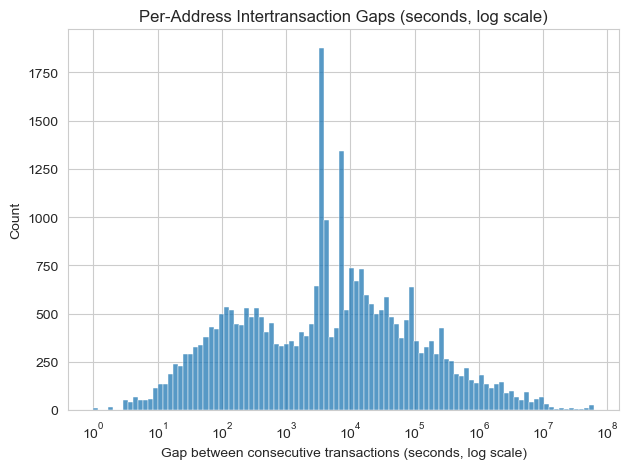


----------------------------------------
Intertransaction gap CDF
----------------------------------------



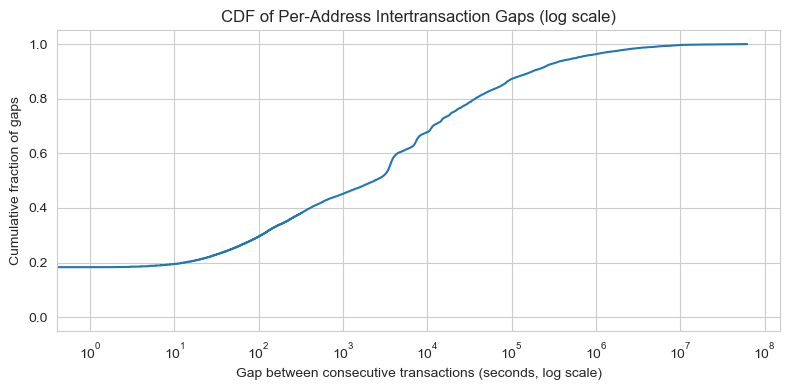

In [10]:
# ------------------------------------------------------------
# 3. Intertransaction gaps for each sender address
# ------------------------------------------------------------

util.print_heading("Section 3 — Intertransaction Gaps (Per Address)")

# Compute per-address gaps (sender-side)
df_sorted = df.sort_values(["from_address", "block_timestamp_dt"])
df_sorted["gap"] = (
    df_sorted.groupby("from_address")["block_timestamp_dt"]
             .diff()
             .dt.total_seconds()
)

gaps = df_sorted["gap"].dropna()

# Quick numeric summary for context
util.print_sub_heading("Intertransaction gap summary (seconds)")
print(gaps.describe()[["min", "25%", "50%", "75%", "mean", "max"]])

# Gap histogram (log scale)
util.print_sub_heading("Intertransaction gap distribution (log histogram)")
sns.histplot(gaps, bins=100, log_scale=True)
plt.title("Per-Address Intertransaction Gaps (seconds, log scale)")
plt.xlabel("Gap between consecutive transactions (seconds, log scale)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Gap CDF (log-scaled x-axis)
util.print_sub_heading("Intertransaction gap CDF")
gaps_sorted = gaps.sort_values()
yvals = np.arange(len(gaps_sorted)) / float(len(gaps_sorted))

plt.figure(figsize=(8, 4))
plt.plot(gaps_sorted, yvals)
plt.xscale("log")
plt.title("CDF of Per-Address Intertransaction Gaps (log scale)")
plt.xlabel("Gap between consecutive transactions (seconds, log scale)")
plt.ylabel("Cumulative fraction of gaps")
plt.tight_layout()
plt.show()

## 4. Gas & Value Behavior

Look at how **gas**, **gas price**, and **transferred value** are distributed, and how value and gas price interact.  
These shapes tell us a lot about “normal” economic behavior vs. odd pockets where scams may live.


Section 4 — Gas & Value Behavior (Cleaned + Joint)


----------------------------------------
Gas distribution (log histogram)
----------------------------------------



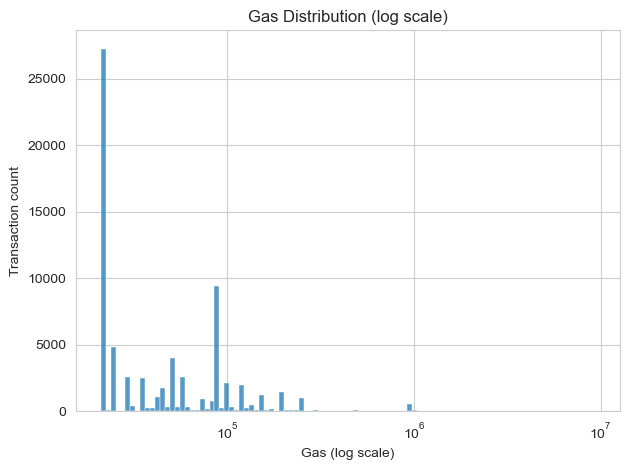


----------------------------------------
Gas price distribution (log histogram)
----------------------------------------



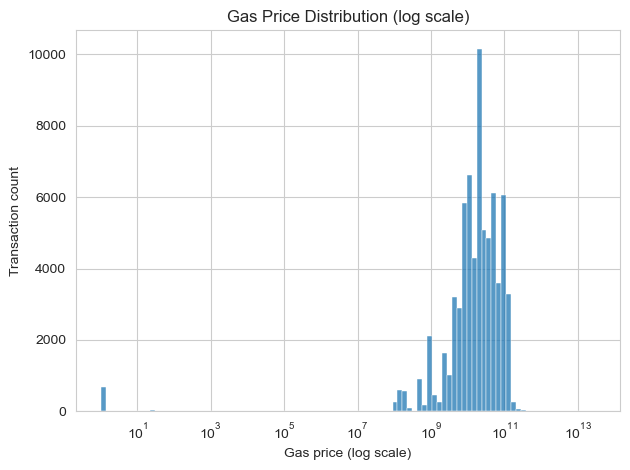


----------------------------------------
Joint value vs gas price (hexbin, log-log)
----------------------------------------



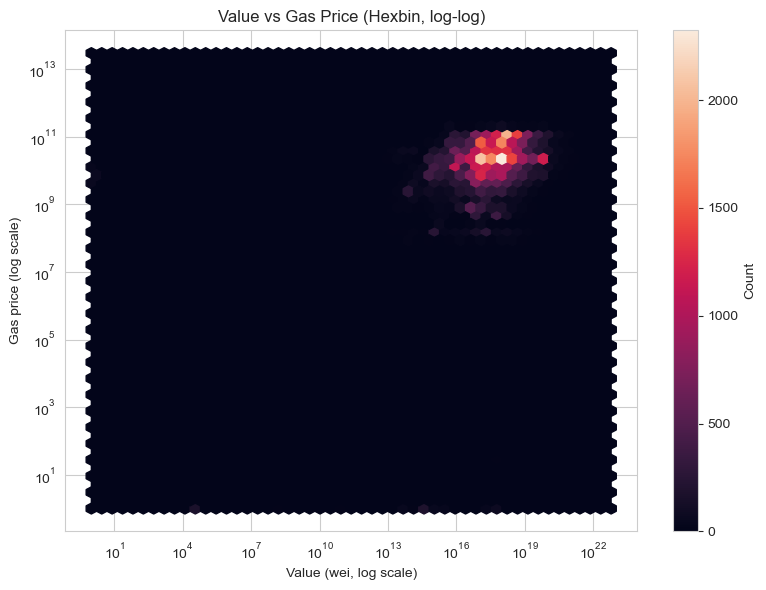

In [16]:
# ------------------------------------------------------------
# 4. Gas & value behavior (marginals + joint view)
# ------------------------------------------------------------

util.print_heading("Section 4 — Gas & Value Behavior (Cleaned + Joint)")

# --------------------------------------------------------
# 4.1 Gas and gas_price distributions (log histograms)
# --------------------------------------------------------

util.print_sub_heading("Gas distribution (log histogram)")
sns.histplot(df["gas"], bins=100, log_scale=True)
plt.title("Gas Distribution (log scale)")
plt.xlabel("Gas (log scale)")
plt.ylabel("Transaction count")
plt.tight_layout()
plt.show()

util.print_sub_heading("Gas price distribution (log histogram)")
sns.histplot(df["gas_price"], bins=100, log_scale=True)
plt.title("Gas Price Distribution (log scale)")
plt.xlabel("Gas price (log scale)")
plt.ylabel("Transaction count")
plt.tight_layout()
plt.show()

# --------------------------------------------------------
# 4.2 Joint value vs gas_price (hexbin, log-log)
# --------------------------------------------------------

util.print_sub_heading("Joint value vs gas price (hexbin, log-log)")

# Focus on strictly positive values so log scales are valid
tmp = df[(df["value"] > 0) & (df["gas_price"] > 0)]

plt.figure(figsize=(8, 6))
plt.hexbin(
    tmp["value"],
    tmp["gas_price"],
    gridsize=50,
    xscale="log",
    yscale="log",
)
plt.colorbar(label="Count")
plt.xlabel("Value (wei, log scale)")
plt.ylabel("Gas price (log scale)")
plt.title("Value vs Gas Price (Hexbin, log-log)")
plt.tight_layout()
plt.show()

## 5. Input Length & Transaction Type

Use the length of the hex-encoded `input` field as a cheap proxy for transaction type:  
plain ETH transfers vs contract calls vs token operations.


Section 5 — Input Length / Transaction Type


----------------------------------------
Distribution of input length
----------------------------------------



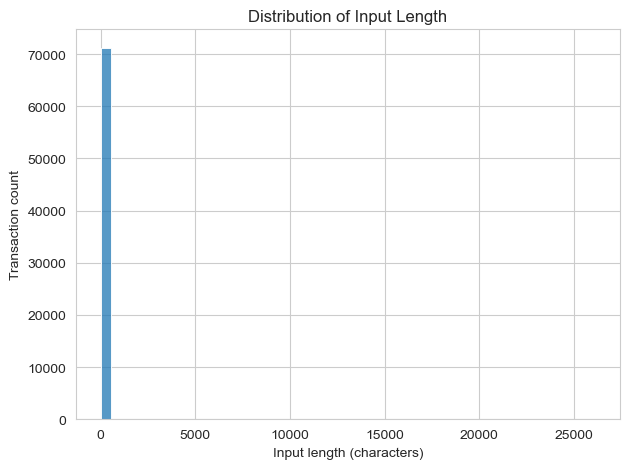


----------------------------------------
Top input length buckets
----------------------------------------



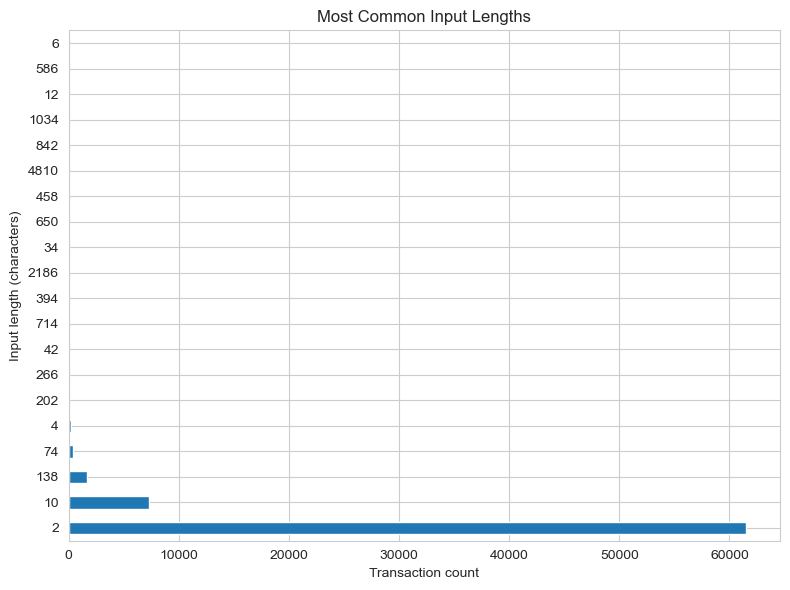

In [12]:
# ------------------------------------------------------------
# 5. Input length as a proxy for transaction type
# ------------------------------------------------------------

util.print_heading("Section 5 — Input Length / Transaction Type")

# Compute input string lengths per transaction
df["input_len"] = df["input"].astype(str).apply(len)

# Overall distribution of input lengths
util.print_sub_heading("Distribution of input length")
sns.histplot(df["input_len"], bins=50)
plt.title("Distribution of Input Length")
plt.xlabel("Input length (characters)")
plt.ylabel("Transaction count")
plt.tight_layout()
plt.show()

# Most common input length buckets
util.print_sub_heading("Top input length buckets")
df["input_len"].value_counts().head(20).plot(kind="barh", figsize=(8, 6))
plt.title("Most Common Input Lengths")
plt.xlabel("Transaction count")
plt.ylabel("Input length (characters)")
plt.tight_layout()
plt.show()

## 6. Address Activity Patterns

Look at how active each address is as a sender/receiver.  
Ethereum activity is usually heavy-tailed: a few “whales” dominate, most addresses barely move.  
Fraud can show up both in hyper-active hubs and in very focused funnels.


Section 6 — Address Activity Patterns


----------------------------------------
Address rank–frequency (Zipf plot)
----------------------------------------



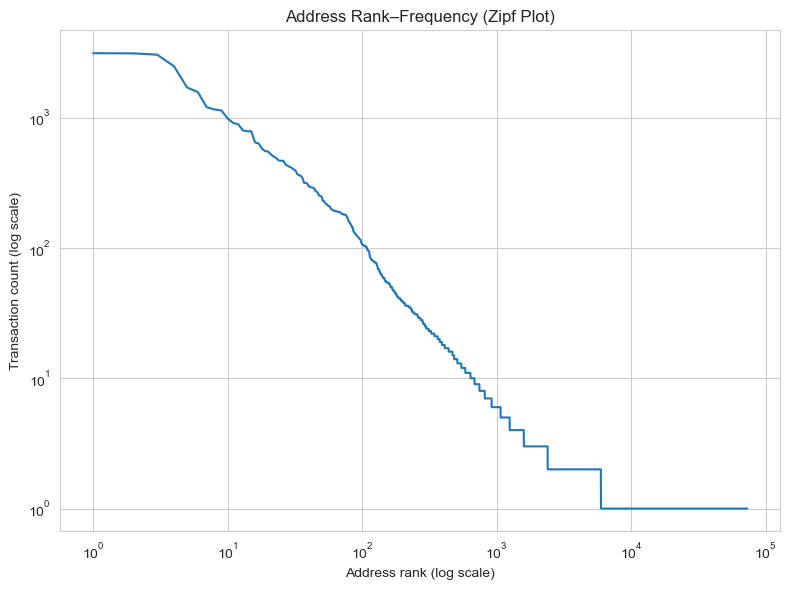


----------------------------------------
In-degree CDF (transactions received)
----------------------------------------



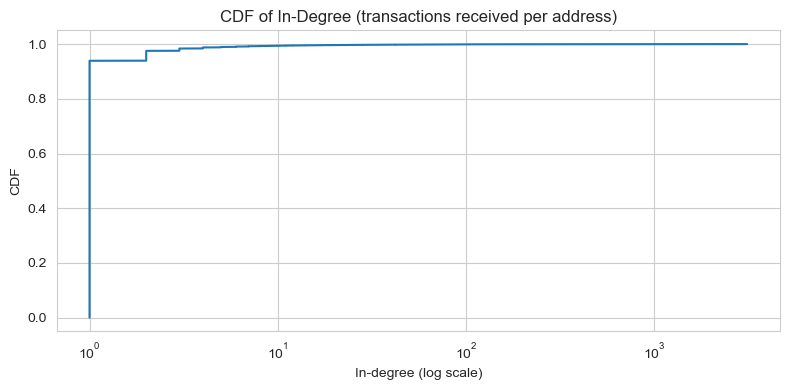


----------------------------------------
Out-degree CDF (transactions sent)
----------------------------------------



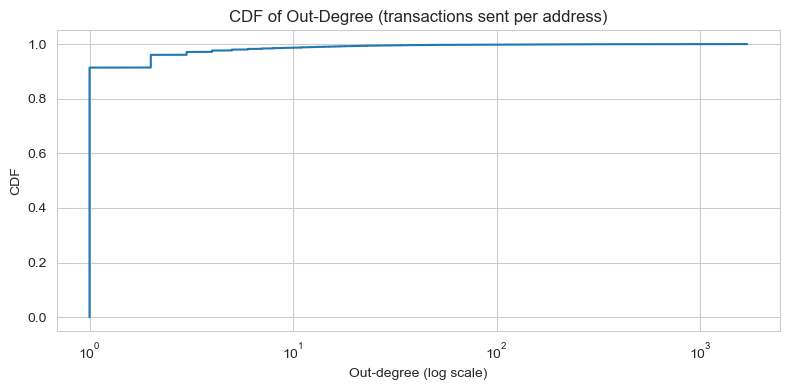

In [13]:
# ------------------------------------------------------------
# 6. Address activity patterns (degree & heavy tails)
# ------------------------------------------------------------

util.print_heading("Section 6 — Address Activity Patterns")

# Compute per-address transaction counts
from_counts = df["from_address"].value_counts()
to_counts   = df["to_address"].value_counts()
address_counts = from_counts.add(to_counts, fill_value=0)

# --------------------------------------------------------
# 6.1 Rank–frequency (Zipf-style) plot for total activity
# --------------------------------------------------------

util.print_sub_heading("Address rank–frequency (Zipf plot)")

rank = np.arange(1, len(address_counts) + 1)
freq = np.sort(address_counts.values)[::-1]

plt.figure(figsize=(8, 6))
plt.loglog(rank, freq)
plt.xlabel("Address rank (log scale)")
plt.ylabel("Transaction count (log scale)")
plt.title("Address Rank–Frequency (Zipf Plot)")
plt.tight_layout()
plt.show()

# --------------------------------------------------------
# 6.2 In-degree CDF (received transactions per address)
# --------------------------------------------------------

util.print_sub_heading("In-degree CDF (transactions received)")

in_deg = to_counts.sort_values()
cdf_in = np.arange(len(in_deg)) / len(in_deg)

plt.figure(figsize=(8, 4))
plt.plot(in_deg.values, cdf_in)
plt.xscale("log")
plt.xlabel("In-degree (log scale)")
plt.ylabel("CDF")
plt.title("CDF of In-Degree (transactions received per address)")
plt.tight_layout()
plt.show()

# --------------------------------------------------------
# 6.3 Out-degree CDF (sent transactions per address)
# --------------------------------------------------------

util.print_sub_heading("Out-degree CDF (transactions sent)")

out_deg = from_counts.sort_values()
cdf_out = np.arange(len(out_deg)) / len(out_deg)

plt.figure(figsize=(8, 4))
plt.plot(out_deg.values, cdf_out)
plt.xscale("log")
plt.xlabel("Out-degree (log scale)")
plt.ylabel("CDF")
plt.title("CDF of Out-Degree (transactions sent per address)")
plt.tight_layout()
plt.show()

## 7. Scam vs Non-Scam Behavior

Compare how **scam-linked** vs **non-scam** transactions differ in value, gas price,  
and high-level categories. These side-by-side plots show whether the labels map to
distinct behavioral regimes.


Section 7 — Scam vs Non-Scam Behavior


----------------------------------------
Scam vs non-scam transaction counts
----------------------------------------

is_scam_tx
False    57000
True     14250
Name: count, dtype: int64

----------------------------------------
Value distribution: scam vs non-scam
----------------------------------------



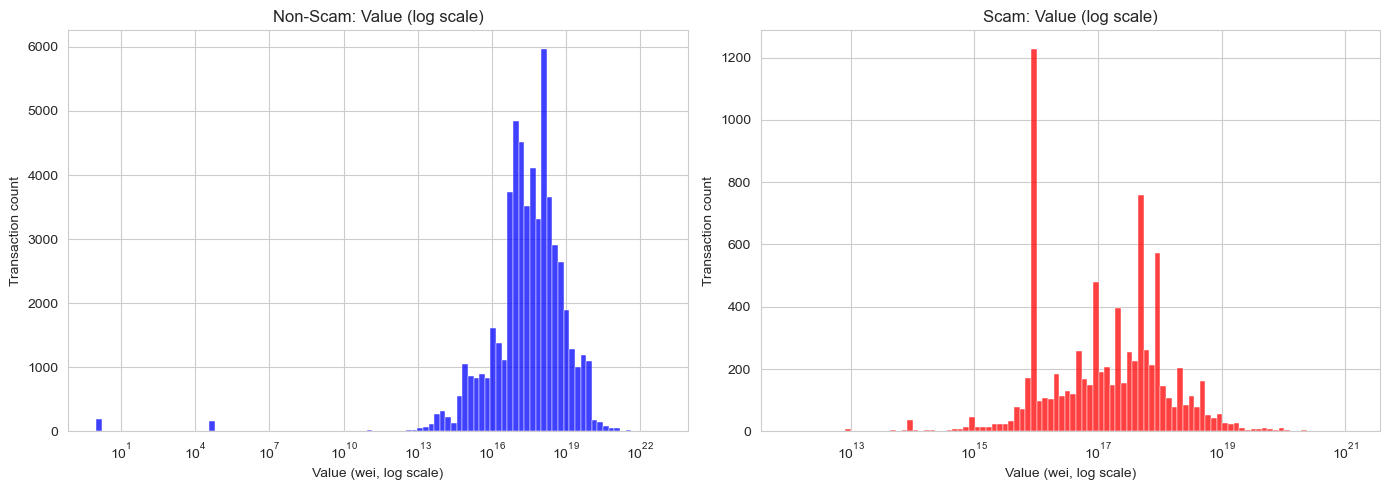


----------------------------------------
Gas price distribution: scam vs non-scam
----------------------------------------



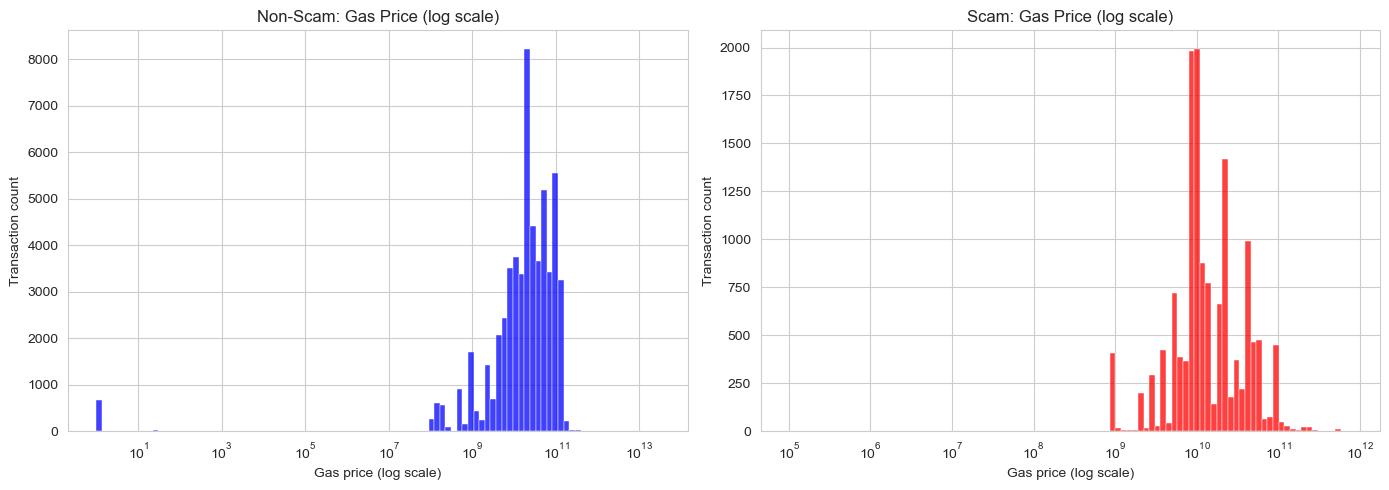


----------------------------------------
Top non-missing categories (from_category)
----------------------------------------



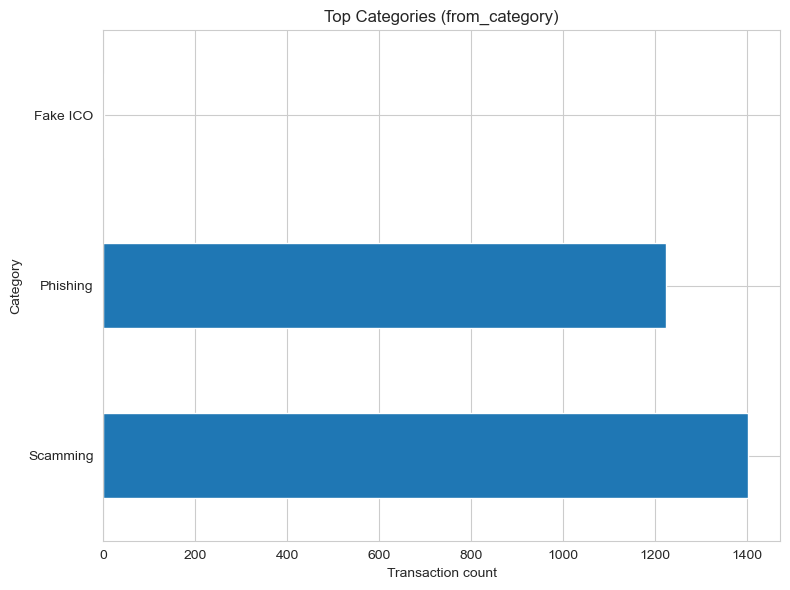

In [14]:
# ------------------------------------------------------------
# 7. Scam vs non-scam behavior
# ------------------------------------------------------------

util.print_heading("Section 7 — Scam vs Non-Scam Behavior")

# A transaction is considered scam-related if either side is tagged as scam
scam_mask = (df["from_scam"] == 1) | (df["to_scam"] == 1)

util.print_sub_heading("Scam vs non-scam transaction counts")
print(df.assign(is_scam_tx=scam_mask)["is_scam_tx"].value_counts())

# --------------------------------------------------------
# 7.1 Value distributions (scam vs non-scam)
# --------------------------------------------------------

util.print_sub_heading("Value distribution: scam vs non-scam")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(
    df.loc[~scam_mask, "value"],
    bins=100,
    log_scale=True,
    ax=axes[0],
    color="blue",
)
axes[0].set_title("Non-Scam: Value (log scale)")
axes[0].set_xlabel("Value (wei, log scale)")
axes[0].set_ylabel("Transaction count")

sns.histplot(
    df.loc[scam_mask, "value"],
    bins=100,
    log_scale=True,
    ax=axes[1],
    color="red",
)
axes[1].set_title("Scam: Value (log scale)")
axes[1].set_xlabel("Value (wei, log scale)")
axes[1].set_ylabel("Transaction count")

plt.tight_layout()
plt.show()

# --------------------------------------------------------
# 7.2 Gas price distributions (scam vs non-scam)
# --------------------------------------------------------

util.print_sub_heading("Gas price distribution: scam vs non-scam")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(
    df.loc[~scam_mask, "gas_price"],
    bins=100,
    log_scale=True,
    ax=axes[0],
    color="blue",
)
axes[0].set_title("Non-Scam: Gas Price (log scale)")
axes[0].set_xlabel("Gas price (log scale)")
axes[0].set_ylabel("Transaction count")

sns.histplot(
    df.loc[scam_mask, "gas_price"],
    bins=100,
    log_scale=True,
    ax=axes[1],
    color="red",
)
axes[1].set_title("Scam: Gas Price (log scale)")
axes[1].set_xlabel("Gas price (log scale)")
axes[1].set_ylabel("Transaction count")

plt.tight_layout()
plt.show()

# --------------------------------------------------------
# 7.3 Top non-missing categories (from_category)
# --------------------------------------------------------

util.print_sub_heading("Top non-missing categories (from_category)")

(
    df["from_category"]
    .dropna()
    .value_counts()
    .head(10)
    .plot(kind="barh", figsize=(8, 6))
)
plt.title("Top Categories (from_category)")
plt.xlabel("Transaction count")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

In [15]:
# ------------------------------------------------------------
# 8. EDA completion marker
# ------------------------------------------------------------

util.print_heading("EDA Complete — Dataset Ready for Feature Engineering")

util.print_sub_heading("Next step")
print(
    "Core data checks, distributions, and behavioral patterns have been reviewed. "
    "Proceed to address-level feature engineering and model experiments."
)


EDA Complete — Dataset Ready for Feature Engineering


----------------------------------------
Next step
----------------------------------------

Core data checks, distributions, and behavioral patterns have been reviewed. Proceed to address-level feature engineering and model experiments.


## Key Takeaways from the EDA

---

### 1. This is a stitched subset of Ethereum, not a full firehose

The timestamp distribution and daily volume curve show dense activity in a few windows with quieter stretches in between. All timestamps parse cleanly (no parsing failures, no missing `hour`), but the coverage is clearly irregular rather than a continuous scrape of the chain. *(See Section 2.2.)*

**Implication:**  
Time features should be interpreted as describing **per-wallet behavior within this sampled window**, not global network conditions.

---

### 2. Scam and category labels are sparse and asymmetric

`from_scam` and `to_scam` exist for every row, but only about 19% of transactions are scam-related at all (either side flagged). In contrast, the text categories are extremely sparse: `from_category` is populated for only a small fraction of rows, and `to_category` is available more often but still missing for most transactions. Scam labels also skew toward the **receiver** side (`to_scam` mean > `from_scam` mean). *(See Section 1.2 and Section 7.)*

**Implication:**  
Category text should be treated as **optional context**, not a core signal. Modeling and evaluation should focus on the scam flags and engineered behavior, and be aware of moderate class imbalance and the sender/receiver asymmetry.

---

### 3. Time-of-day and weekday patterns are weak but not nonexistent

Transactions hit all 24 hours with only a mild bump in late-morning / afternoon. Weekdays are uneven (some days noticeably heavier than others), but there isn’t a clean “work-week vs weekend” rhythm. *(See Section 2.3.)*

**Implication:**  
Hour / weekday features may provide **subtle** signal (especially once combined with other behavior), but they are not primary drivers on their own.

---

### 4. Intertransaction gaps show heavy-tailed, bursty behavior

The gap summary and the log-scale histogram / CDF show many very short gaps and a long tail of very large gaps. Wallets often sit idle, then fire off rapid bursts of transactions. *(See Section 3.)*

**Implication:**  
Gap-based statistics (min / max / mean gap, burstiness, active duration) are promising features for distinguishing human-paced vs bot-like and scammy behavior.

---

### 5. Gas usage and value are extremely skewed

Gas, `gas_price`, and `value` histograms on a log scale all exhibit long tails and distinct operating regimes. The value vs `gas_price` hexbin plot shows dense “normal” zones plus scattered outliers. *(See Section 4.)*

**Implication:**  
Raw per-transaction values are not directly interpretable; **address-level aggregates** (mean / max / total value, mean gas price / gas limit) are much more stable and informative for modeling.

---

### 6. Input length confirms a mix of plain transfers and contract interactions

Most transactions have `input_len = 2` (plain ETH transfers). A long tail of larger input lengths corresponds to contract calls and token operations. *(See Section 5.)*

**Implication:**  
Simple input-length statistics per address can act as a cheap proxy for “plain transfer wallet” vs “contract-heavy wallet”.

---

### 7. Address activity is heavy-tailed

The rank–frequency (Zipf) plot and in/out-degree CDFs show that a tiny fraction of addresses account for most of the activity, while the majority appear only once or a handful of times. *(See Section 6.)*

**Implication:**  
Degree, transaction count, and unique counterparty features are essential. Scam behavior can show up as either extremely low-diversity funnels or unusually high fan-out.

---

### 8. Scam vs non-scam distributions differ, but with overlap

Scam-linked transactions make up a meaningful minority of the dataset and show shifted / heavier tails in value and `gas_price` relative to non-scams, though the distributions still overlap. *(See Section 7.)*

**Implication:**  
There is genuine separable signal in the engineered **behavioral aggregates** (value/gas, timing, degree, burstiness), but the problem is not trivially linearly separable. The downstream model is justified in leaning on these features, while still expecting some ambiguity near the decision boundary.